# T-SNE,  t-Distributed Stochastic Neighbor Embedding

This is a non-linear dimensionality reduction method,   it models each high dimensional space point in 2 or 3 dimensions,  where similar points are close together 
dissimilar points are farther apart.   This is much like NMMDS

T-SNE constructs probability distribution functions in the high dimensional space such that similar points have a high probability of being close to one another
and also creates a distribution in the low dimensional space.  The low dimensional space is then adjusted to minimize the Kullback-Leibler divergence 
(an information theory distance) between the two distributions.

It is wise to use a PCA or other dimensionality reduction before t-SNE if there are more than 50 or so features

In [1]:
# Import libraries
'''Main'''
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

'''Data Viz'''
import matplotlib.pyplot as plt
import seaborn as sns
color = sns.color_palette()
import matplotlib as mpl

%matplotlib inline

'''Data Prep and Model Evaluation'''
from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import log_loss
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report


We are using the MNIST data set again,  since it's pretty demanding

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [3]:
X,y=mnist["data"],mnist["target"]
print(X.shape)
print (y.shape)

(70000, 784)
(70000,)


In [4]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [5]:
type(X_train)

pandas.core.frame.DataFrame

In [ ]:
We will run a PCA first and then compute t-SNE on the PCA scores

In [6]:
from sklearn.decomposition import PCA

n_components = 784
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, \
          random_state=random_state)

In [7]:
train_index = range(0,len(X_train))
X_train_PCA = pca.fit_transform(X_train)
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

In [8]:
# Percentage of Variance Captured by 784 principal components
print("Variance Explained by all 784 principal components: ", \
      sum(pca.explained_variance_ratio_))

Variance Explained by all 784 principal components:  0.9999999999999992


In [9]:
# Percentage of Variance Captured by X principal components
importanceOfPrincipalComponents = \
    pd.DataFrame(data=pca.explained_variance_ratio_)
importanceOfPrincipalComponents = importanceOfPrincipalComponents.T

print('Variance Captured by First 10 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:9].sum(axis=1).values)
print('Variance Captured by First 20 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:19].sum(axis=1).values)
print('Variance Captured by First 50 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:49].sum(axis=1).values)
print('Variance Captured by First 100 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:99].sum(axis=1).values)
print('Variance Captured by First 200 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:199].sum(axis=1).values)
print('Variance Captured by First 300 Principal Components: ',
      importanceOfPrincipalComponents.loc[:,0:299].sum(axis=1).values)

Variance Captured by First 10 Principal Components:  [0.4881498]
Variance Captured by First 20 Principal Components:  [0.6435809]
Variance Captured by First 50 Principal Components:  [0.82464686]
Variance Captured by First 100 Principal Components:  [0.91462857]
Variance Captured by First 200 Principal Components:  [0.96644735]
Variance Captured by First 300 Principal Components:  [0.98622875]


A plotting function for ordination scores

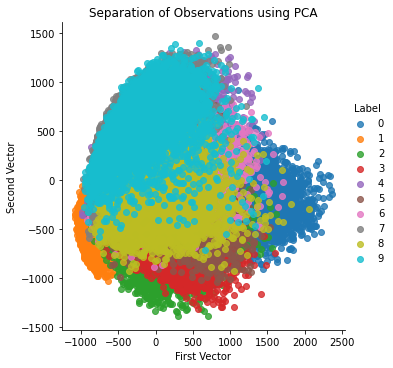

In [34]:
def scatterPlot(xDF, yDF, algoName):
    tempDF = pd.DataFrame(data=xDF.loc[:,0:1], index=xDF.index)
    tempDF = pd.concat((tempDF,yDF), axis=1, join="inner")
    tempDF.columns = ["First Vector", "Second Vector", "Label"]
    sns.lmplot(x="First Vector", y="Second Vector", hue="Label", \
               data=tempDF, fit_reg=False)
    ax = plt.gca()
    ax.set_title("Separation of Observations using "+algoName)

scatterPlot(X_train_PCA, y_train, "PCA")

### Computing t-SNE

For a 2D embedding


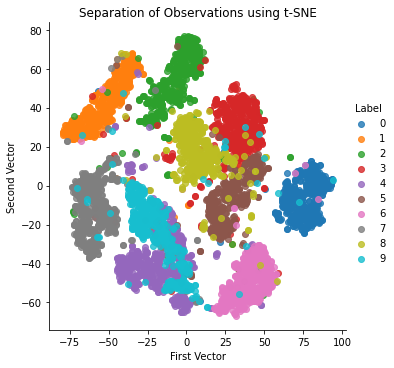

In [13]:
# t-SNE
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:5000,:30])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[:5001])

scatterPlot(X_train_tSNE, y_train, "t-SNE")

In [ ]:
# slow, you may want to skips this step, using different numbers of PCA components

# t-SNE
from sklearn.manifold import TSNE

n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)



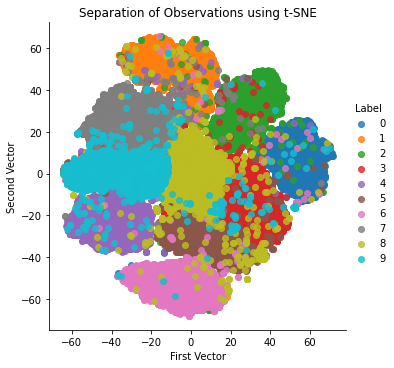

In [15]:
X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[:,:120])
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index)

scatterPlot(X_train_tSNE, y_train, "t-SNE")

How does a logistic regression based on t-SNE values do relative to a log regression on the original variables?



In [16]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression(max_iter=300)
log_reg.fit(X_train, y_train)

C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [19]:
log_reg.score(X_train, y_train)

0.9387666666666666

In [18]:
log_reg_tSNE = LogisticRegression(max_iter=300)
log_reg_tSNE.fit(X_train_tSNE,y_train)

C:\Users\hdavi\Anaconda3\envs\base2\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=300)

In [20]:
log_reg_tSNE.score(X_train_tSNE,y_train)

0.9534666666666667

In [ ]:
## A three dimensional t-SNE

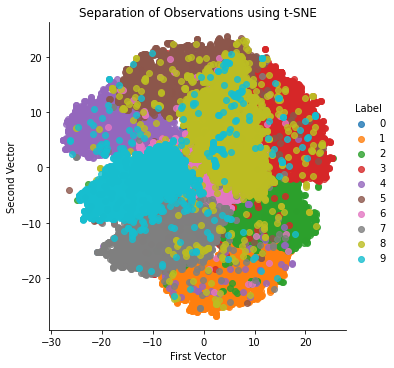

In [32]:
# t-SNE


n_components = 3
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = 'random'
random_state = 2018

tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, \
            perplexity=perplexity, early_exaggeration=early_exaggeration, \
            init=init, random_state=random_state)

X_train_tSNE2 = tSNE.fit_transform(X_train_PCA)
X_train_tSNE2 = pd.DataFrame(data=X_train_tSNE2, index=train_index)

scatterPlot(X_train_tSNE2.iloc[:,0:2], y_train, "t-SNE")

In [37]:
log_reg_tSNE = LogisticRegression(max_iter=300)
log_reg_tSNE.fit(X_train_tSNE2,y_train)

LogisticRegression(max_iter=300)

In [39]:
log_reg_tSNE.score(X_train_tSNE2, y_train)

0.9598